In [1]:
# File is from Nov 8 - Random  File over 12 months pulling zids there were a part of Zedge DAU

import pandas as pd

data = pd.read_csv('Zedge_Data/Zedge-ID-VisitDates.csv',parse_dates=[0])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 4 columns):
date                   65535 non-null datetime64[ns]
zid                    65535 non-null object
Visit Num              65535 non-null int64
Days Between Visits    65535 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.0+ MB


In [2]:
data.head()

# assign dates into month-yy buckets and a cohort month

# assign visits into a cohort index based on first date seen
group = data.groupby('zid')['date']

# assign the Install_Date
data['start_date'] = group.transform('min')

data.head()

cyear = data['date'].dt.year
cmonth = data['date'].dt.month
cday = data['date'].dt.day

syear = data['start_date'].dt.year
smonth = data['start_date'].dt.month
sday = data['start_date'].dt.day

year_diff = cyear - syear
month_diff = cmonth - smonth
day_diff = cday - sday

data['CohortVisitIndex'] = round((year_diff * 365 + month_diff  *30 + day_diff +1))
data['start_date'] = data.start_date.map(lambda x: x.strftime('%Y-%m'))
data['visit_month'] = data.date.map(lambda x: x.strftime('%Y-%m'))


# Remove the element at index 2 in list    

data.head(50)

,date,zid,Visit Num,Days Between Visits,start_date,CohortVisitIndex,visit_month
0,2018-07-10,0001747ed65afd3584c7aefc5c3f0f5599474126,1,0,2018-07,1,2018-07
1,2018-04-17,00018ea0ec1ae06f747eb3022feefaf0b1227042,1,0,2018-04,1,2018-04
2,2018-06-25,00018ea0ec1ae06f747eb3022feefaf0b1227042,2,69,2018-04,69,2018-06
3,2018-08-10,00018ea0ec1ae06f747eb3022feefaf0b1227042,3,46,2018-04,114,2018-08
4,2018-11-04,00018ea0ec1ae06f747eb3022feefaf0b1227042,4,86,2018-04,198,2018-11
5,2017-12-08,0007053c0de6db2e1c64a565db4053241b4e95ea,1,0,2017-12,1,2017-12
6,2018-01-22,0007053c0de6db2e1c64a565db4053241b4e95ea,2,45,2017-12,50,2018-01
7,2018-02-01,0007053c0de6db2e1c64a565db4053241b4e95ea,3,10,2017-12,59,2018-02
8,2018-02-02,0007053c0de6db2e1c64a565db4053241b4e95ea,4,1,2017-12,60,2018-02
9,2018-02-23,0007053c0de6db2e1c64a565db4053241b4e95ea,5,21,2017-12,81,2018-02


In [3]:

zids_unique = data.groupby(['start_date','CohortVisitIndex'])



zids_unique = zids_unique['zid'].nunique()

zids_unique1 = zids_unique.reset_index()

zids_unique1.head()

data_pivot = zids_unique1.pivot_table(index='start_date',
                            columns = 'CohortVisitIndex',
                             values = 'zid')


data_pivot.sort_index(ascending=True)



CohortVisitIndex,1,2,3,4,5,6,7,8,9,10,...,356,357,358,359,360,361,362,363,364,365
start_date,,,,,,,,,,,,,,,,,,,,,
2017-11,2289.0,373.0,242.0,205.0,139.0,166.0,171.0,148.0,125.0,141.0,...,11.0,20.0,17.0,11.0,15.0,5.0,11.0,7.0,3.0,1.0
2017-12,1587.0,281.0,141.0,125.0,86.0,84.0,72.0,79.0,63.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1101.0,189.0,117.0,87.0,70.0,68.0,61.0,55.0,64.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,822.0,172.0,102.0,82.0,62.0,47.0,48.0,45.0,40.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03,969.0,215.0,141.0,108.0,80.0,72.0,68.0,65.0,53.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04,748.0,174.0,87.0,72.0,63.0,51.0,54.0,42.0,44.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05,706.0,149.0,87.0,60.0,54.0,49.0,52.0,40.0,47.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06,727.0,162.0,112.0,63.0,60.0,59.0,52.0,44.0,31.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07,694.0,169.0,92.0,67.0,67.0,49.0,44.0,41.0,38.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# avg_visits
# retention_rate

cohort_visit_sizes = data_pivot.iloc[:,0]
#Divide all values in the cohort_counts table by cohort_sizes

retention = data_pivot.divide(cohort_visit_sizes, axis=0)
#Review the retention table

print (f' RETENTION RATES OVER TIME')
retention.round(3) * 100

 RETENTION RATES OVER TIME


CohortVisitIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
start_date,,,,,,,,,,,,,
2017-11,100.0,47.6,40.0,36.4,31.6,27.8,24.7,22.7,18.5,16.8,16.3,13.8,6.6
2017-12,100.0,39.8,33.5,25.5,23.4,20.2,18.5,15.6,15.8,12.3,12.4,5.7,NaN
2018-01,100.0,32.9,28.3,20.6,18.9,14.4,15.0,12.1,11.0,10.3,4.1,NaN,NaN
2018-02,100.0,36.3,28.3,22.6,21.2,16.5,15.2,13.1,10.5,2.7,NaN,NaN,NaN
2018-03,100.0,34.7,25.9,22.5,17.8,15.7,16.1,13.1,5.7,NaN,NaN,NaN,NaN
2018-04,100.0,32.1,23.8,18.2,16.8,15.4,11.9,4.7,NaN,NaN,NaN,NaN,NaN
2018-05,100.0,30.5,23.9,21.4,18.7,14.7,5.2,NaN,NaN,NaN,NaN,NaN,NaN
2018-06,100.0,32.3,24.2,21.6,20.1,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07,100.0,33.7,28.7,18.4,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


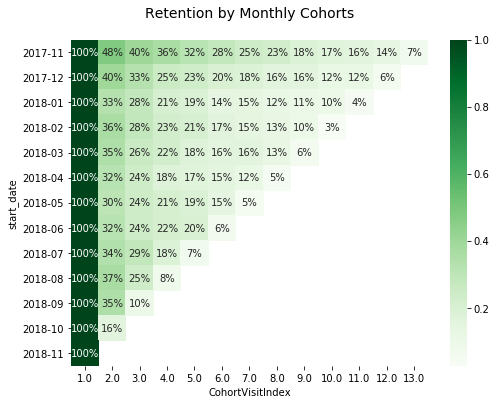

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8,6))

# Add a title
plt.title('Retention by Monthly Cohorts\n', fontsize=14)

# Create the heatmap
sns.heatmap(data=retention,fmt='.0%',annot=True, cmap='Greens')
plt.show()


In [19]:
groupvisits = data.groupby(['start_date', 'CohortVisitIndex','zid'])

groupvisits = groupvisits['Visit Num'].count()

groupvisits.head()

#Reset the index of cohort_data
groupvisits = groupvisits.reset_index()

groupvisits.head()


,start_date,CohortVisitIndex,zid,Visit Num
0,2017-11,1.0,000a2dce56bc69b9ed82c3c1ff7ed882754dffb8,2
1,2017-11,1.0,000a525a4761132c85eb16d223fc5a8a7cd5158f,1
2,2017-11,1.0,0018fc5dbeed8e25a3a41134e54726533f7132db,3
3,2017-11,1.0,0028b5a435fdf3a3d191c19fba17f9fb545efbd2,2
4,2017-11,1.0,002c5c11f670422a7ba5ec720b08a0651de3c8c3,1


In [20]:
# Avg Visits within Time Period

pivot_visits = groupvisits.pivot_table(index='start_date',
                                       columns = 'CohortVisitIndex',
                                       values = 'Visit Num',
                                       aggfunc = 'mean')

pivot_visits.round(2)

CohortVisitIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
start_date,,,,,,,,,,,,,
2017-11,2.03,2.51,2.45,2.46,2.37,2.27,2.31,2.14,2.30,2.05,2.17,2.08,1.97
2017-12,1.82,2.12,2.16,2.03,2.08,1.89,1.98,2.02,2.14,2.14,2.01,1.70,NaN
2018-01,1.92,2.22,2.04,1.95,1.91,1.87,1.81,1.77,1.78,1.87,1.62,NaN,NaN
2018-02,2.02,2.47,2.02,2.06,1.93,1.95,1.89,1.75,1.78,1.41,NaN,NaN,NaN
2018-03,2.11,2.28,2.34,1.96,2.05,2.14,2.10,2.06,1.65,NaN,NaN,NaN,NaN
2018-04,2.06,2.35,2.29,2.20,2.40,2.19,2.16,1.20,NaN,NaN,NaN,NaN,NaN
2018-05,2.02,2.08,2.30,2.27,2.15,2.22,1.68,NaN,NaN,NaN,NaN,NaN,NaN
2018-06,2.04,2.40,2.12,2.04,2.21,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07,2.07,2.52,2.36,2.27,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


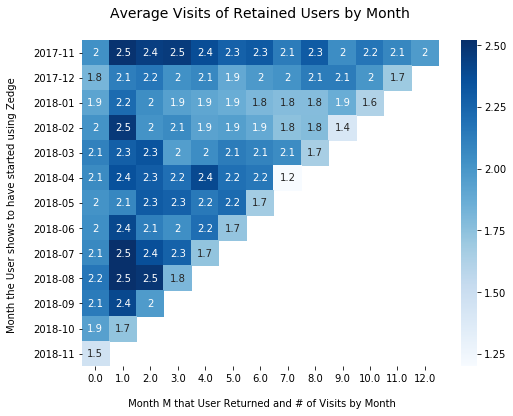

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8,6))

# Add a title
plt.title('Average Visits of Retained Users by Month\n', fontsize=14)


# Create the heatmap
sns.heatmap(data=pivot_visits,annot=True, cmap='Blues')
plt.xlabel('\n Month M that User Returned and # of Visits by Month')
plt.ylabel('Month the User shows to have started using Zedge \n')
plt.show()


In [21]:
data_pivot = data.pivot_table(index='start_date',
                              columns = 'CohortVisitIndex',
                              values = 'Days Between Visits',
                              aggfunc = 'mean')


data_pivot.sort_index(ascending=True)
print(f'Avg Days Between Visits')
data_pivot.round(1)

Avg Days Between Visits


CohortVisitIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
start_date,,,,,,,,,,,,,
2017-11,1.9,10.3,14.6,17.0,20.3,20.5,22.7,27.2,24.8,31.9,29.0,30.5,26.2
2017-12,1.5,11.2,18.0,22.0,25.4,28.8,35.2,35.0,34.5,33.2,37.0,31.8,NaN
2018-01,1.7,11.3,20.8,24.8,28.6,37.5,41.2,42.2,42.6,41.4,42.4,NaN,NaN
2018-02,1.5,9.8,19.4,23.2,28.7,28.4,33.6,39.3,37.1,43.1,NaN,NaN,NaN
2018-03,1.6,11.2,17.4,24.8,25.9,30.4,32.8,31.7,28.0,NaN,NaN,NaN,NaN
2018-04,1.7,10.5,17.5,21.3,23.9,30.7,34.0,46.4,NaN,NaN,NaN,NaN,NaN
2018-05,1.6,12.5,18.1,24.4,25.4,27.5,22.7,NaN,NaN,NaN,NaN,NaN,NaN
2018-06,1.5,10.6,18.6,24.6,24.4,32.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07,1.5,10.7,17.1,17.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


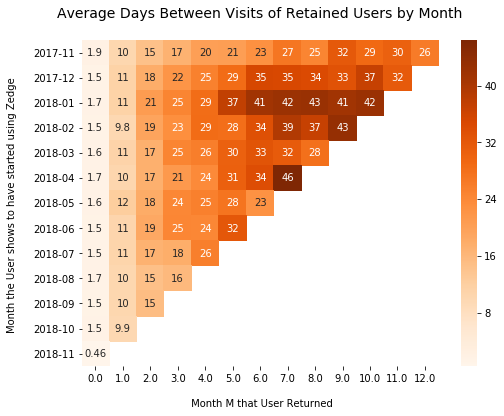

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8,6))

# Add a title
plt.title('Average Days Between Visits of Retained Users by Month\n', fontsize=14)


# Create the heatmap
sns.heatmap(data=data_pivot,annot=True, cmap='Oranges')
plt.xlabel('\n Month M that User Returned')
plt.ylabel('Month the User shows to have started using Zedge \n')
plt.show()


In [45]:
#LOOK AT USERS THAT VISIT 2 TIMES

visit_num = 2
# assign the Install_Date
data['lastvisit_date'] = group.transform('max')

data.head()

two_visits = data[data['Visit Num'] == 3]

two_visits.head()

visits_2 = two_visits.pivot_table(index='start_date', columns = 'CohortVisitIndex', values='Days Between Visits', 
                                   aggfunc = 'mean')

visits_2.round()



CohortVisitIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
start_date,,,,,,,,,,,,
2017-11,4.0,14.0,29.0,43.0,62.0,72.0,99.0,114.0,136.0,99.0,69.0,169.0
2017-12,3.0,13.0,28.0,49.0,50.0,86.0,107.0,98.0,104.0,166.0,139.0,64.0
2018-01,3.0,15.0,32.0,37.0,57.0,99.0,90.0,134.0,117.0,155.0,NaN,NaN
2018-02,3.0,15.0,31.0,43.0,56.0,75.0,77.0,89.0,97.0,259.0,NaN,NaN
2018-03,4.0,17.0,34.0,40.0,78.0,86.0,106.0,111.0,70.0,NaN,NaN,NaN
2018-04,4.0,16.0,38.0,41.0,72.0,108.0,111.0,116.0,NaN,NaN,NaN,NaN
2018-05,4.0,19.0,35.0,51.0,77.0,97.0,60.0,NaN,NaN,NaN,NaN,NaN
2018-06,3.0,16.0,35.0,52.0,54.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-07,3.0,19.0,33.0,47.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# % of Users and when they return a 2nd time

cohort_visit = visits_2.iloc[:,0]
#Divide all values in the cohort_counts table by cohort_sizes

retention_2 = visits_2.divide(cohort_visit, axis=0)
#Review the retention table

print (f' RETENTION RATES OVER TIME')
retention_2.round(3) * 100

 RETENTION RATES OVER TIME


CohortVisitIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
start_date,,,,,,,,,,,,
2017-11,100.0,81.4,37.1,22.8,13.3,8.6,4.7,4.8,3.4,3.6,1.4,1.7
2017-12,100.0,84.4,50.6,21.9,10.3,12.2,9.4,9.4,5.0,1.6,2.5,0.9
2018-01,100.0,55.2,32.6,20.1,11.3,7.1,10.9,6.7,5.4,5.9,NaN,NaN
2018-02,100.0,55.5,29.0,17.0,13.0,11.5,6.5,5.0,2.5,0.5,NaN,NaN
2018-03,100.0,45.5,19.8,14.6,6.3,5.6,5.2,3.7,0.7,NaN,NaN,NaN
2018-04,100.0,41.3,18.4,11.2,10.2,10.7,6.1,1.0,NaN,NaN,NaN,NaN
2018-05,100.0,46.7,29.9,16.8,16.2,4.8,2.4,NaN,NaN,NaN,NaN,NaN
2018-06,100.0,43.3,19.3,15.0,13.4,2.7,NaN,NaN,NaN,NaN,NaN,NaN
2018-07,100.0,50.0,26.9,8.8,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


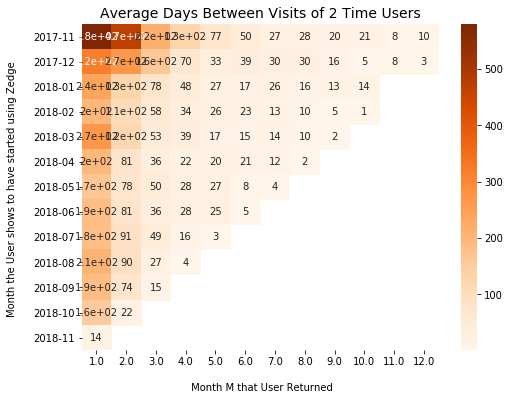

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8,6))

# Add a title
plt.title('Average Days Between Visits of 2 Time Users', fontsize=14)


# Create the heatmap
sns.heatmap(data=visits_2,annot=True, cmap='Oranges')
plt.xlabel('\n Month M that User Returned')
plt.ylabel('Month the User shows to have started using Zedge \n')
plt.show()
